# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems

A  classification is where you try to classify something as one thing or another
* binary classification
* Multiclass classification
* Multilable classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y =  make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#  Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


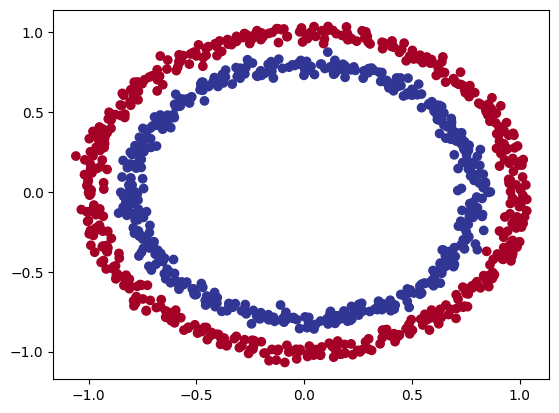

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
7. Tweak
8. Evaluate...

In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2.  Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 1.4265 - accuracy: 0.4650
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.4840
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4840


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X,y )

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932410001754761, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we migh want to add more layers or increase the hidden units within a layer.
2. Compiling a model - here we migh to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate a model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5090


[0.7019295692443848, 0.5090000033378601]

Whenever your model is performing strangely or there is something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model predictions.

To visualize our model predictions, let's create a function `plot_decision_boundary()`, this function will:


* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resource:
  - cs231n neural networks case study
  - Made with ML
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together


  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multicass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [18]:
import matplotlib.pyplot as plt

313/313 [==============================] - 1s 1ms/step
doing binary classification


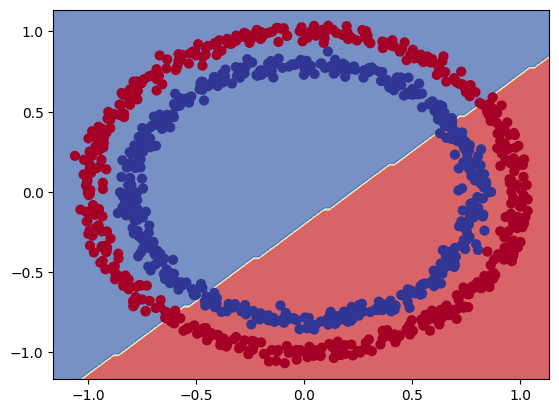

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [21]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y =  X + 100

# Split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But...we're now working on a regression problem, let's change our model to suit our data.

In [22]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 361.7979 - mae: 361.7979
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 258.5244 - mae: 258.5244
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 157.1618 - mae: 157.1618
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 57.0917 - mae: 57.0917
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 70.6777 - mae: 70.6777
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 80.5383 - mae: 80.5383
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 54.3879 - mae: 54.3879
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 46.6669 - mae: 46.6669
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.6164 - mae: 46.6164
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.0567 - mae: 43.0567
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


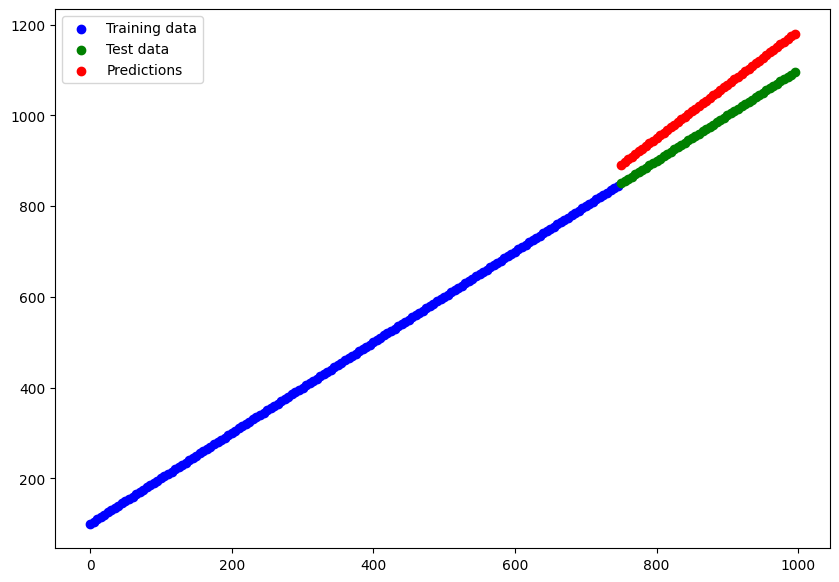

In [23]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's prediction against  our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4958 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4660 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4548 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4356 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4267 - accuracy: 0.4700
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4207 - accuracy: 0.4690
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4057 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3883 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3532 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3406 - accuracy: 0.4740
Epoch 11/

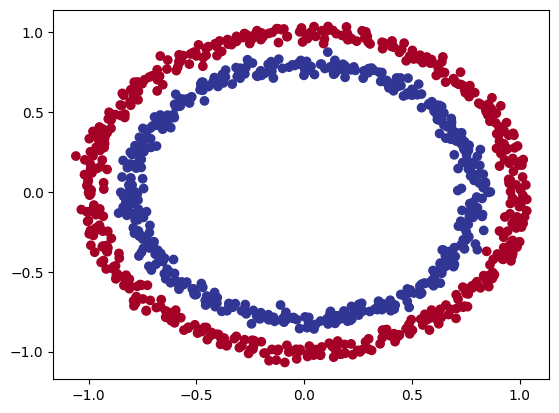

In [25]:
# Check out our data

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


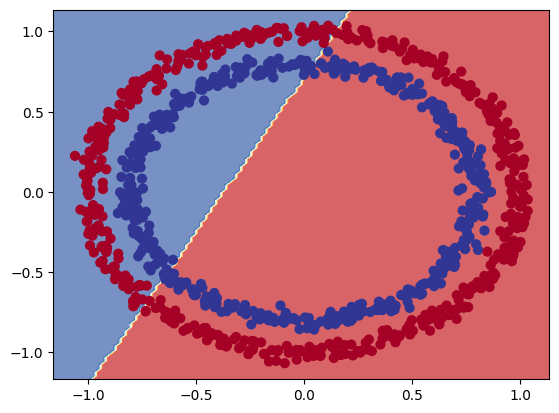

In [26]:
# Check out the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

# Let's try build our first neural network with a non-linear activation funciton.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)

])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1035 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0985 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0886 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0848 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0639 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0518 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0478 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0302 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0242 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0229 - accuracy: 0.4810
Epoch 11/

In [28]:
# Time to replicate the multi-layer neural network from playground tensorflow in code.

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. fit our model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 3.3031 - accuracy: 0.4710
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.5531 - accuracy: 0.4730
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2829 - accuracy: 0.4720
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2201 - accuracy: 0.4690
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.4690
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1305 - accuracy: 0.4660
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0950 - accuracy: 0.4680
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.4700
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0365 - accuracy: 0.4730
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0119 - accuracy: 0.4660
Epoch 11/

In [29]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9950


[0.030755557119846344, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification


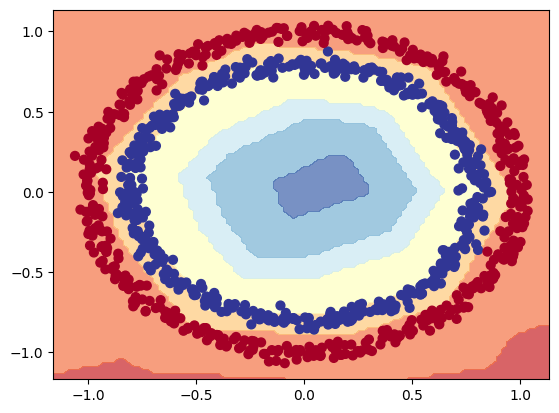

In [30]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [59]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7223 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5530
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6040
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5610
Epoch 11/

In [60]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.8080


[0.526771605014801, 0.8080000281333923]

313/313 [==============================] - 0s 1ms/step
doing binary classification


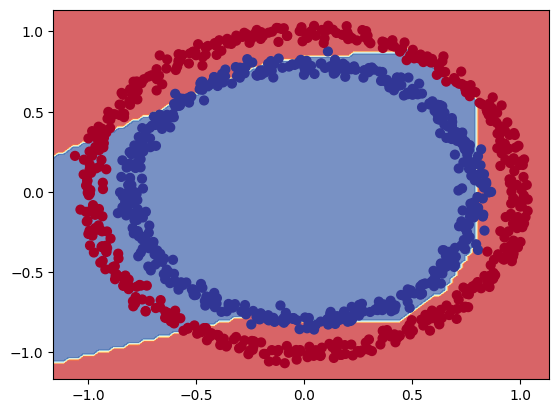

In [61]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** what's wrong with the predictions we've made? Are we really evaluating our model correctly?


**Note:** The combinasion of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [62]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

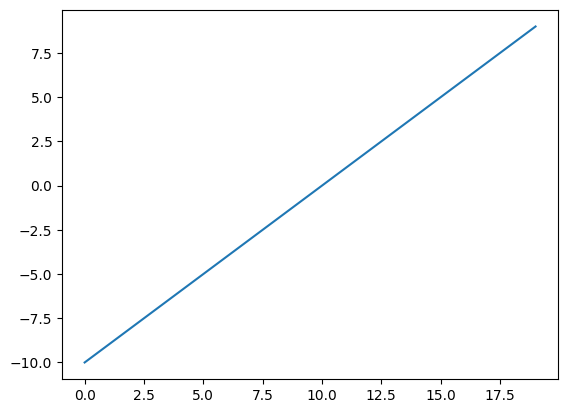

In [63]:
# Visualize our toy tensor
plt.plot(A)

In [64]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1+tf.exp(-x))


# Use our sigmoi function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

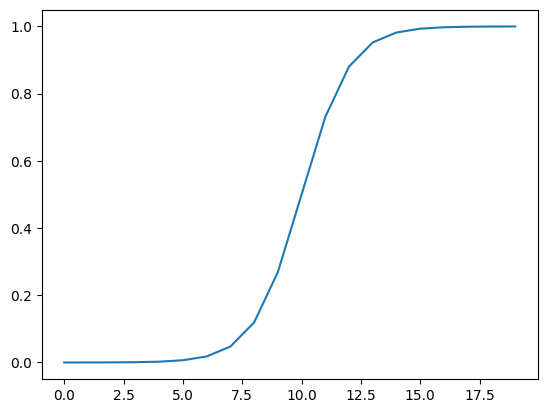

In [65]:
plt.plot(sigmoid(A))

In [66]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Let's pass our toy tensor into our relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

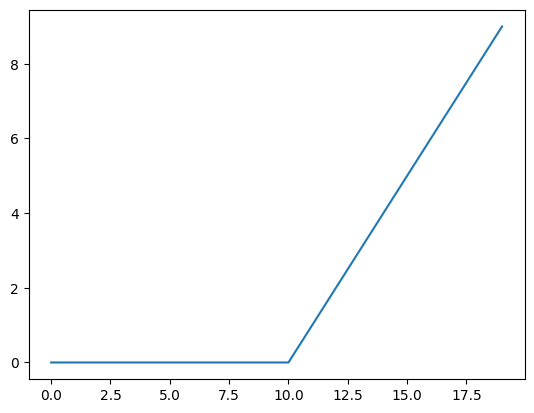

In [67]:
plt.plot(relu(A))

In [68]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

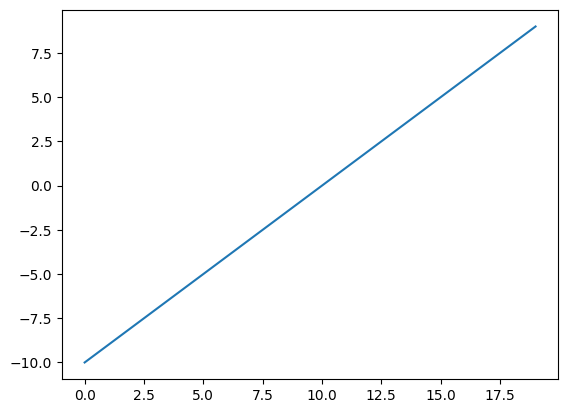

In [69]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [70]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [71]:
# Check how many examples we have
len(X)

1000

In [72]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [73]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test= X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [74]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6989 - accuracy: 0.4762
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5013
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5525
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5562
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5700
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5713
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6062
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.5863
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6875
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7362
Epoch 11/25
25/25 [

In [75]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9950


[0.0558636412024498, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


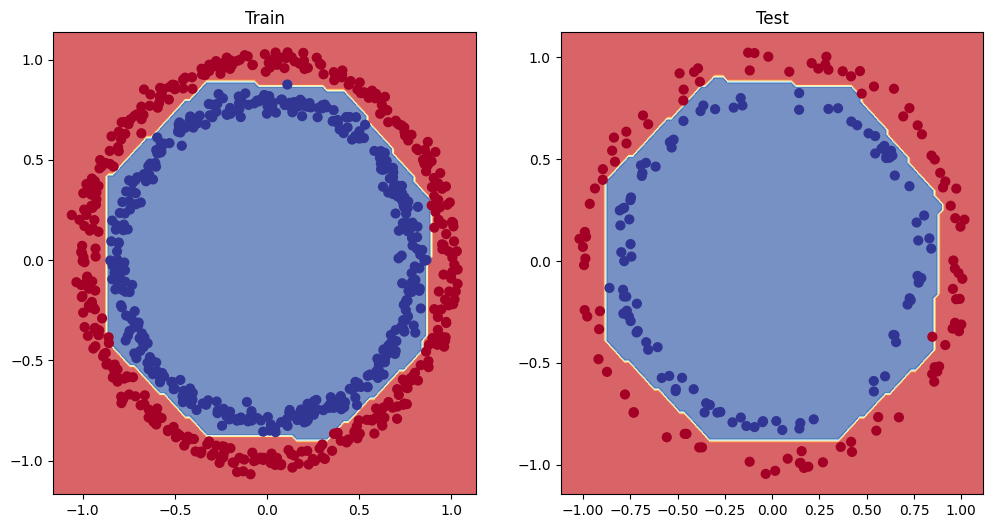

In [76]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

# Let's see how we can plot the loss (or training) curves


In [77]:
# Convert the history into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.698925,0.47625
1,0.690071,0.50125
2,0.683390,0.55250
3,0.676506,0.55625
4,0.670657,0.57000
5,0.662556,0.57125
6,0.652584,0.60625
7,0.645948,0.58625
8,0.627662,0.68750
9,0.594682,0.73625


Text(0.5, 1.0, 'Model_8 loss curves')

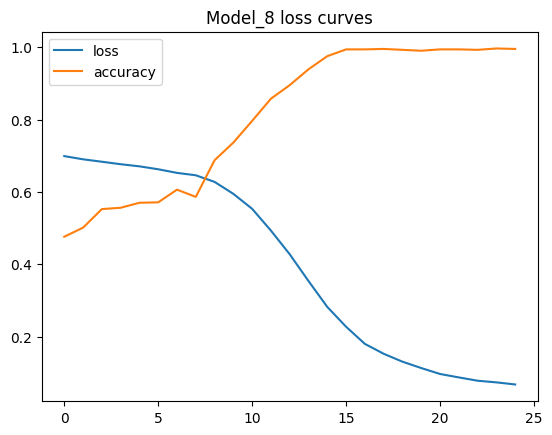

In [78]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the idea learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A leanring rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model **while** it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Create a leanring rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7207 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7149 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

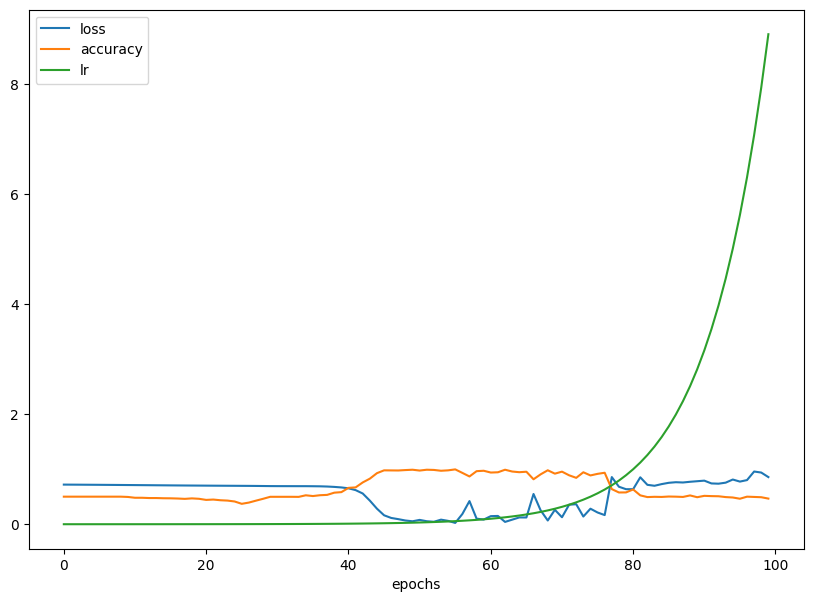

In [80]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

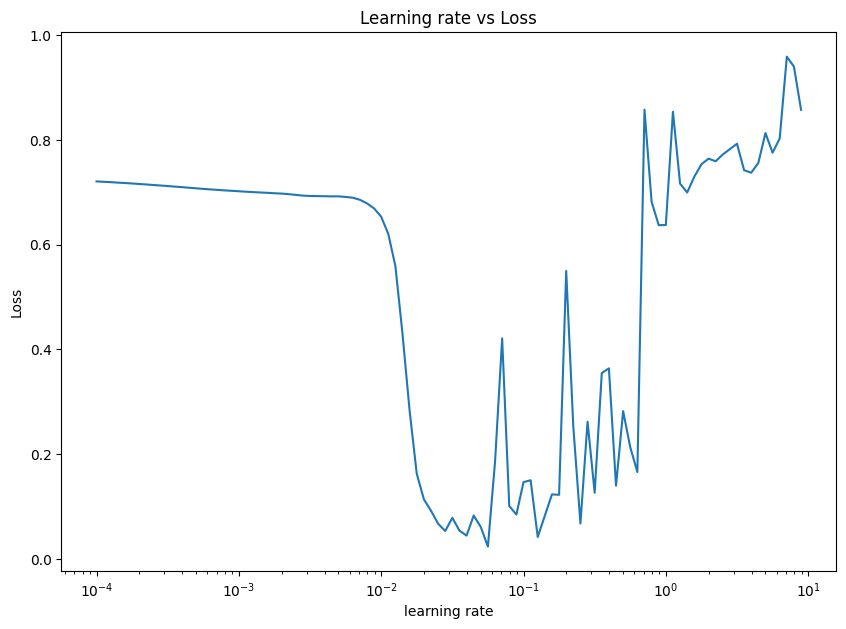

In [81]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [82]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [83]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])


# fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5525
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6100
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7663
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8075
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8813
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8963
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9262
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9688
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1610 - accuracy: 0.9825
Epoch 11/20
25/25 [

In [84]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9750


[0.08520395308732986, 0.9750000238418579]

In [85]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9950


[0.0558636412024498, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


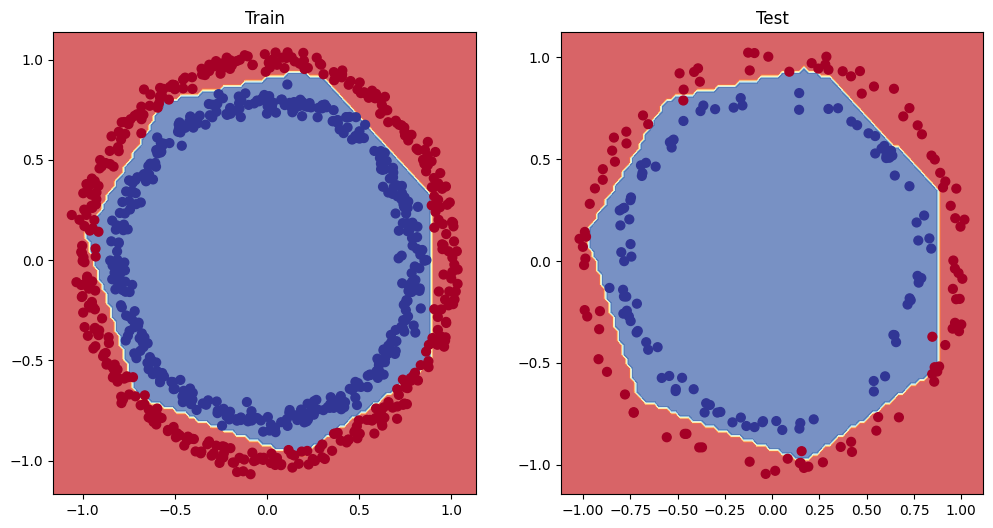

In [86]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are handful of other classification methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [87]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.9750
Model loss on the test set:0.08520395308732986
Model accuracy on the test set:97.50%


How about a confusion matrix

In [88]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [89]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [90]:
y_preds[:10]

array([[9.9450111e-01],
       [9.9757111e-01],
       [9.9449450e-01],
       [9.9716574e-01],
       [7.8323977e-03],
       [4.2668891e-01],
       [9.5591003e-01],
       [2.2704706e-04],
       [9.9166763e-01],
       [2.4012160e-03]], dtype=float32)

Looks like our predictions array has come out in **prediciton probability** form... the standard output from sigmoid (or softmax)
activation functions.

In [92]:
# Convert our prediction probabilities to binary format and view the first 10

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [93]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  5],
       [ 0, 99]])

How about we prettify our confusion matrix?

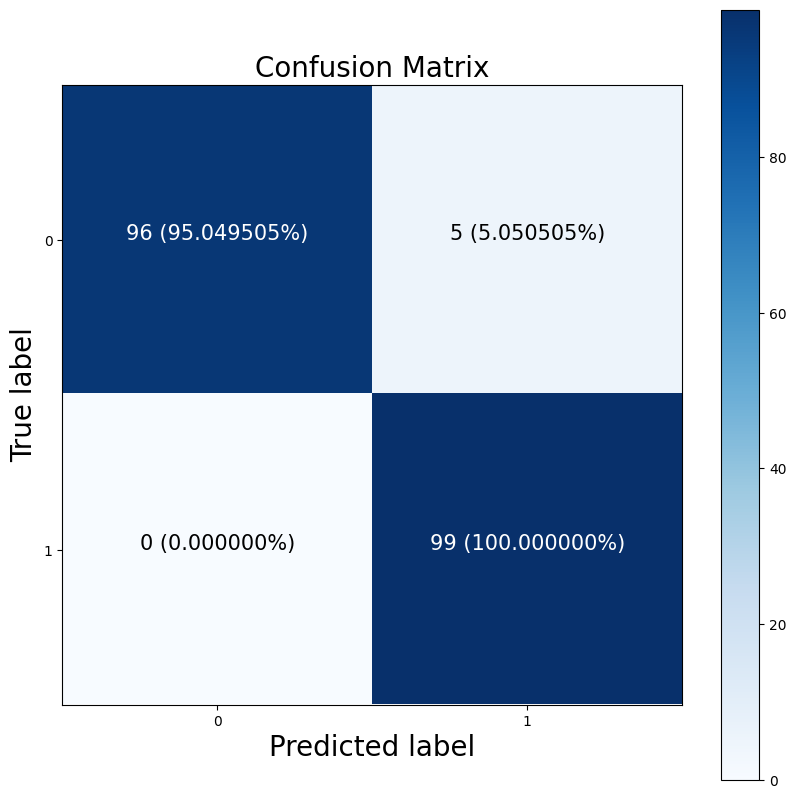

In [110]:
# Note:  the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # normalize our confusion matrix
n_classes =  cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j, in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a lager example (multiclass classification)

When you have more than two classses as an option, it's known as **multi-class classifcation**.

* This means if you have 3 different classes, it's multiclass classification.
* It also means if you have 100 different classes, it's multi-class classification.


To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [113]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [114]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [115]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

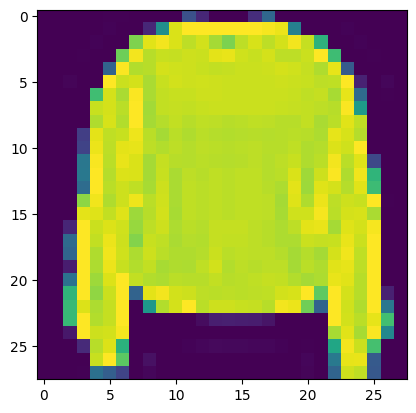

In [118]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [120]:
# Check out samples label
train_labels[7]

2